In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# set configurations
pd.set_option('display.max_columns', 100)
sns.set_style("white")

# model imports
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
import pickle
import joblib

# NLP Imports
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ayaanhaque/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ayaanhaque/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
model_data = pd.read_csv('../data/data_for_model.csv', keep_default_na=False)

In [19]:
class Kmeans:
    """ K Means Clustering
    
    Parameters
    -----------
        k: int , number of clusters
        
        seed: int, will be randomly set if None
        
        max_iter: int, number of iterations to run algorithm, default: 200
        
    Attributes
    -----------
       centroids: array, k, number_features
       
       cluster_labels: label for each data point
       
    """
    
    def __init__(self, k, seed = None, max_iter = 200):
        self.k = k
        self.seed = seed
        if self.seed is not None:
            np.random.seed(self.seed)
        self.max_iter = max_iter
        
            
    
    def initialise_centroids(self, data):
        """Randomly Initialise Centroids
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        centroids: array of k centroids chosen as random data points 
        """
        
        initial_centroids = np.random.permutation(data.shape[0])[:self.k]
        self.centroids = data[initial_centroids]

        return self.centroids
    
    
    def assign_clusters(self, data):
        """Compute distance of data from clusters and assign data point
           to closest cluster.
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
            
        """
        
        if data.ndim == 1:
            data = data.reshape(-1, 1)
        
        dist_to_centroid =  pairwise_distances(data, self.centroids, metric = 'euclidean')
        self.cluster_labels = np.argmin(dist_to_centroid, axis = 1)
        
        return  self.cluster_labels
    
    
    def update_centroids(self, data):
        """Computes average of all data points in cluster and
           assigns new centroids as average of data points
        
        Parameters
        -----------
        data: array or matrix, number_rows, number_features
        
        Returns
        -----------
        centroids: array, k, number_features
        """
        
        self.centroids = np.array([data[self.cluster_labels == i].mean(axis = 0) for i in range(self.k)])
        
        return self.centroids
    
    
    def convergence_calculation(self):
        """
        Calculates 
        
        """
        pass
    
    def predict(self, data):
        """Predict which cluster data point belongs to
        
        Parameters
        ----------
        data: array or matrix, number_rows, number_features
        
        Returns
        --------
        cluster_labels: index which minmises the distance of data to each
        cluster
        """
        
        return self.assign_clusters(data)
    
    def fit_kmeans(self, data):
        """
        This function contains the main loop to fit the algorithm
        Implements initialise centroids and update_centroids
        according to max_iter
        -----------------------
        
        Returns
        -------
        instance of kmeans class
            
        """
        self.centroids = self.initialise_centroids(data)
        
        # Main kmeans loop
        for iter in range(self.max_iter):

            self.cluster_labels = self.assign_clusters(data)
            self.centroids = self.update_centroids(data)          
            if iter % 100 == 0:
                print("Running Model Iteration %d " %iter)
        print("Model finished running")
        return self    

In [20]:
# Cleaning the Text
def processing_text(series_to_process):
    new_list = []
    tokenizer = RegexpTokenizer(r'(\w+)')
    lemmatizer = WordNetLemmatizer()

    for i in range(len(series_to_process)):
        # tokenized item in a new list
        dirty_string = (series_to_process)[i].lower()
        words_only = tokenizer.tokenize(dirty_string) # words_only is a list of only the words, no punctuation
        #Lemmatize the words_only
        words_only_lem = [lemmatizer.lemmatize(i) for i in words_only]
        # removing stop words
        words_without_stop = [i for i in words_only_lem if i not in stopwords.words("english")]
        # return seperated words
        long_string_clean = " ".join(word for word in words_without_stop)
        new_list.append(long_string_clean)
        return new_list

In [21]:
#Vectorization : -

from sklearn.feature_extraction.text import TfidfVectorizer

X = model_data["megatext_clean"]
y = model_data['is_suicide']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

tvec_optimised = TfidfVectorizer(ngram_range=(1, 3),stop_words = 'english')
X_train_tvec = tvec_optimised.fit_transform(X_train).todense()
X_test_tvec = tvec_optimised.transform(X_test).todense()

tvec_optimised = TfidfVectorizer(ngram_range=(1, 3),stop_words = 'english')
X_train_tvec = tvec_optimised.fit_transform(X_train).todense()
X_test_tvec = tvec_optimised.transform(X_test).todense()

In [30]:
modelkmeans = KMeans(n_clusters=2, init='k-means++', n_init=100)
# modelkmeans = KMeans(2,1,100) figure out how to use this guys class
modelkmeans.fit(X_train_tvec)

KMeans(n_clusters=2, n_init=100)

In [32]:
joblib.dump(modelkmeans, "kmeans.h5")

['kmeans.h5']

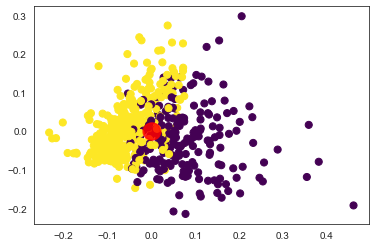

In [33]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(X_test_tvec)

predicted_values = modelkmeans.predict(X_test_tvec)
# fitted = modelkmeans.fit(X_test_tvec)

plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

# centers = fitted.centroids once we get the Kmeans class working, we can graph centroids
centers = np.array(modelkmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1],c='red', s=300, alpha=0.6);